In [1]:
import pandas as pd
import seaborn as sns

In [2]:
meteo_2022 = pd.read_csv('meteo_202201-202212.csv', encoding='IBM860')

In [3]:
meteo_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   8760 non-null   int64  
 1   dt_iso               8760 non-null   object 
 2   city_name            8760 non-null   object 
 3   temp                 8760 non-null   float64
 4   feels_like           8760 non-null   float64
 5   temp_min             8760 non-null   float64
 6   temp_max             8760 non-null   float64
 7   pressure             8760 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             8760 non-null   int64  
 11  wind_speed           8760 non-null   float64
 12  rain_1h              1898 non-null   float64
 13  clouds_all           8760 non-null   int64  
 14  weather_description  8760 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

<Axes: >

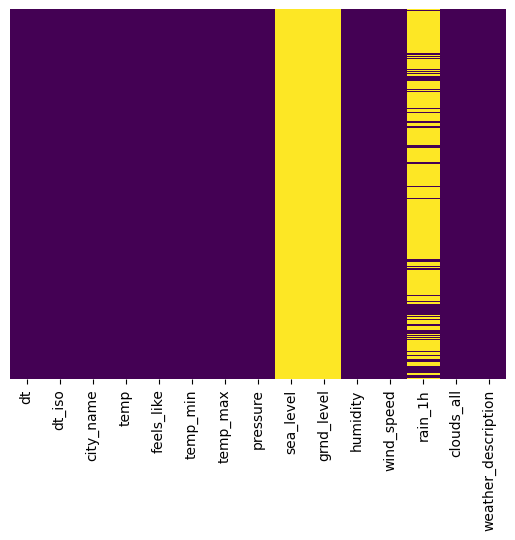

In [4]:
sns.heatmap(meteo_2022.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
meteo_2022.drop('sea_level', axis=1, inplace=True)
meteo_2022.drop('grnd_level', axis=1, inplace=True)

#or missing values => 0...
meteo_2022.drop('rain_1h', axis=1, inplace=True)
#meteo_2022['rain_1h'].fillna(0, inplace=True)

In [6]:
meteo_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   8760 non-null   int64  
 1   dt_iso               8760 non-null   object 
 2   city_name            8760 non-null   object 
 3   temp                 8760 non-null   float64
 4   feels_like           8760 non-null   float64
 5   temp_min             8760 non-null   float64
 6   temp_max             8760 non-null   float64
 7   pressure             8760 non-null   int64  
 8   humidity             8760 non-null   int64  
 9   wind_speed           8760 non-null   float64
 10  clouds_all           8760 non-null   int64  
 11  weather_description  8760 non-null   object 
dtypes: float64(5), int64(4), object(3)
memory usage: 821.4+ KB


In [7]:
meteo_2022.duplicated().sum()

0

In [8]:
meteo_2022.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description
0,1640995200,2022-01-01 00:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,65,3.15,97,overcast clouds
1,1640998800,2022-01-01 01:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,65,3.14,58,broken clouds
2,1641002400,2022-01-01 02:00:00 +0000 UTC,local,16.59,16.03,15.67,16.72,1024,66,3.12,23,few clouds
3,1641006000,2022-01-01 03:00:00 +0000 UTC,local,13.59,12.75,11.61,16.16,1023,67,3.08,22,few clouds
4,1641009600,2022-01-01 04:00:00 +0000 UTC,local,14.97,14.27,14.72,15.66,1023,67,3.12,15,few clouds


In [9]:
lista = []
for i in range (meteo_2022['dt_iso'].size):
    s = meteo_2022['dt_iso'][i]
    lista.append (s[0:19])
    
meteo_2022['dt_iso'] = lista
meteo_2022['dt_iso'] = pd.to_datetime (meteo_2022['dt_iso'], format = '%Y-%m-%d %H:%M:%S')

In [10]:
meteo_2022.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description
0,1640995200,2022-01-01 00:00:00,local,16.59,16.00,16.21,16.72,1024,65,3.15,97,overcast clouds
1,1640998800,2022-01-01 01:00:00,local,16.59,16.00,16.21,16.72,1024,65,3.14,58,broken clouds
2,1641002400,2022-01-01 02:00:00,local,16.59,16.03,15.67,16.72,1024,66,3.12,23,few clouds
3,1641006000,2022-01-01 03:00:00,local,13.59,12.75,11.61,16.16,1023,67,3.08,22,few clouds
4,1641009600,2022-01-01 04:00:00,local,14.97,14.27,14.72,15.66,1023,67,3.12,15,few clouds


In [11]:
meteo_2022.drop('dt', axis=1, inplace=True)

<Axes: >

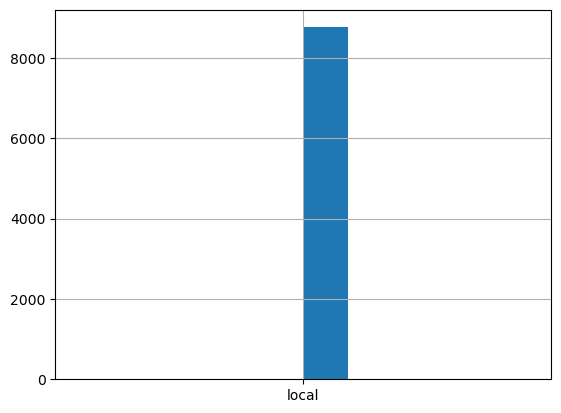

In [12]:
meteo_2022['city_name'].hist()

In [13]:
meteo_2022.drop('city_name', axis=1, inplace=True)

In [14]:
meteo_2022.to_csv("meteo_2022.csv", encoding='utf-8')